In [47]:
from itertools import pairwise
from discopy.frobenius import *
from discopy import python
example = """7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
1 3 6 7 9
"""
x = Ty('x')
splitlines = Box('splitlines', x, x)
split = Box('split', x, x)
safe = Box('safe', x, x)

def increasing(c):
    return all(b<a<=b+3 for a,b in pairwise(c))

def decreasing(c):
    return all(b>a>=b-3 for a,b in pairwise(c))

F = Functor(
    lambda ob: ob,
    {
        splitlines: lambda a: a.splitlines(),
        split: lambda a: [
            [int(s) for s in x.split()]
            for x in a],
        safe: lambda reports: sum(
            1 for c in reports
            if increasing(c) or decreasing(c)),
    },
    cod=Category(python.Ty, python.Function))
columns = splitlines >> split

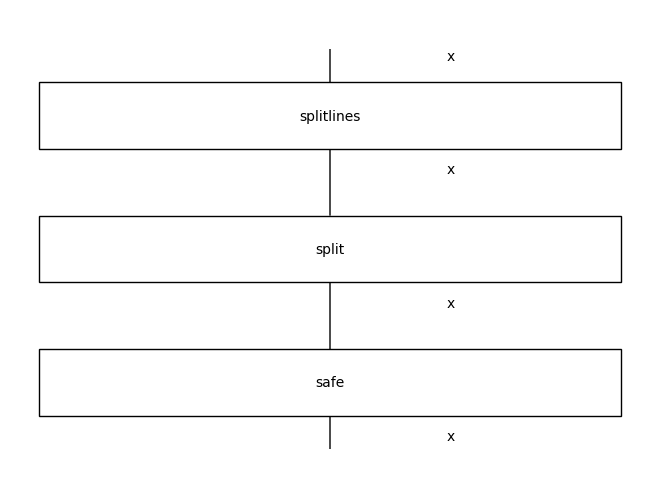

2


In [48]:
f1 = columns >> safe
f1.draw()
print(F(f1)(example))